# Introduction to Notebooks

Jupyter notebooks are an interactive web-based computing platform. In essence, it containts both text-based narrative (through markdown or raw cells) and code cells. The text-based cells provide context for what is run in the code cell. Although notebooks support a wide range of programming languages, within this course, we will use solely Python3. 

This notebook provides an introduction to using python in notebooks along with some capabilities of notebooks.

# Running Python

Any python code can be run inside a code block. If the code produces an output, this will be visible immediately under the code block.

For example:

In [5]:
print('hello world') # prints hello world to the console right under this code block

hello world


As with python, as long as variables have been defined and run in a previous block, they can be referenced in future blocks. Let's define the variable *var*:

In [6]:
var = 5 # assigns the value 5 to the variable var

Then it is accessible in a later block (presuming the block defining the variable has been run):

In [7]:
print(f'value of var: {var}') # prints the value of var to the console

value of var: 5


However, if the variable has not been defined, then it is not accessible:

In [8]:
print(f'value of var: {foo}') # raises an error because bar is not defined

NameError: name 'foo' is not defined

# Interactive Visualisations
One of the principal uses for the notebooks in this course, will be to provide interactive visualisations alongside narrated text. 

For example, for the following, consider the function:
$$
f(x) = sin(x+b) \tag{1}
$$

### Sliders
If we wish to analyse the effect of varying $b$, we could do so by plotting $f(x)$ with a slider for $b$. First load the generic libraries, functions and variables:

In [17]:
# import generic libraries
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output, Image

# Define the function f(x) = sin(x + b)
def f(x, b):
    return np.sin(x + b)

# Define the x values
x = np.linspace(-2 * np.pi, 2 * np.pi, 500)

Add the slider and visualise

In [18]:
# Initialize a display object
output = widgets.Output()

# Function to update the plot and title
def update_plot(b):
    with output:
        clear_output(wait=True)  # Clear the previous output
        plt.figure()  # Create a new figure
        plt.plot(x, f(x, b))
        plt.title(f'Plot of f(x) = sin(x + {b:.2f})')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.grid(True)
        plt.show()

# Create a slider for b
b_slider = widgets.FloatSlider(value=0, min=-2*np.pi, max=2*np.pi, step=0.1, description="b")

# Link the slider to the update_plot function using interactive_output
widgets.interactive(update_plot, b = b_slider)

# Display the slider and the plot
display(b_slider, output)

FloatSlider(value=0.0, description='b', max=6.283185307179586, min=-6.283185307179586)

Output()

Suppose we want to compare two functions, $f(x)$ and $g(x)$ where 
$$ g(x) = cos(x+b) \tag{2} $$ 
We could do so by first defining $g(x)$:

In [11]:
# define g(x)
def g(x, b):
    return np.cos(x + b)

Then adding $g(x)$ and $f(x)$ to the slider. 

In [12]:
# Initialize a display object
output = widgets.Output()

# Function to update the plot and title
def update_plot(b):
    with output:
        clear_output(wait=True)  # Clear the previous output
        plt.figure(figsize=(10, 6))  # Create a new figure with a specified size
        plt.plot(x, f(x, b), label=f'f(x) = sin(x + {b:.2f})', color='blue')
        plt.plot(x, g(x, b), label=f'g(x) = cos(x + {b:.2f})', color='red')
        plt.title(f'Comparison of f(x) and g(x) with b = {b:.2f}')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.grid(True)  # Optional: add a grid for better readability
        plt.show()

# Create a slider for b
b_slider = widgets.FloatSlider(value=0, min=-2*np.pi, max=2*np.pi, step=0.1, description="b")

# Link the slider to the update_plot function using interactive_output
widgets.interactive_output(update_plot, {'b': b_slider})

# Display the slider and the plot
display(b_slider, output)

FloatSlider(value=0.0, description='b', max=6.283185307179586, min=-6.283185307179586)

Output()

### Dropdown menus
Suppose if instead we wanted to select which of the following functions to visualise, we could use dropdown menus.
$$
f_1(x) = sin(x) \tag{3} 
$$ 
$$
g_1(x) = cos(x) \tag{4} 
$$ 
$$
h_1(x) = tan(x) \tag{5} 
$$


In [13]:
def update_plot(function_name):
    # Clear the previous output to avoid overlapping plots
    # clear_output(wait=True)
    # Plot based on the selected function
    if function_name == 'Sine':
        plt.plot(x, np.sin(x), label='sin(x)')
    elif function_name == 'Cosine':
        plt.plot(x, np.cos(x), label='cos(x)')
    elif function_name == 'Tangent':
        plt.plot(x, np.tan(x), label='tan(x)')
    
    # Set plot title and labels
    plt.title(f'{function_name} Function')
    plt.xlabel('X')
    plt.ylabel('Y')
    
    # Add a legend to the plot
    plt.legend()
    
    # Display the updated plot
    plt.show()

# Create a dropdown menu for selecting the function
function_dropdown = widgets.Dropdown(
    options=['Sine', 'Cosine', 'Tangent'],
    value='Sine',
    description='Function:'
)

# Link the dropdown menu to the update_plot function
widgets.interactive(update_plot, function_name=function_dropdown)

interactive(children=(Dropdown(description='Function:', options=('Sine', 'Cosine', 'Tangent'), value='Sine'), …

### Checkboxes and Sliders
Suppose instead, we would like to select which of the functions in Eq. (1)-(2) to visualise simultaneously, whilst interactively visualising how they vary with $b$, we could use checkboxes and a slider to do so:

In [14]:
# define tan(x + b) for completeness
def h(x, b):
    return np.tan(x + b)

In [15]:
# Initialize a display object
output = widgets.Output()

# Function to update the plot and title
def update_plot(show_sin, show_cos, show_tan, b):
    with output:
        clear_output(wait=True)  # Clear the previous output
        plt.figure(figsize=(10, 6))  # Create a new figure with a specified size
        
        if show_sin:
            plt.plot(x, f(x, b), label='f(x) = sin(x)', color='blue')
        
        if show_cos:
            plt.plot(x, g(x, b), label=f'g(x) = cos(x + {b:.2f})', color='red')
        
        if show_tan:
            plt.plot(x, h(x, b), label=f'h(x) = tan(x + {b:.2f})', color='green')
        
        plt.title('Comparison of Selected Functions')
        plt.xlabel('x')
        plt.ylabel('y')
        if show_sin or show_cos or show_tan: # avoids legend error if none of the functions are selected
            plt.legend()
        plt.grid(True)  # add a grid for better readability
        plt.ylim(-10, 10)  # limit y-axis to avoid extreme values in tan(x + b)
        plt.show()

# Create checkboxes for each function
show_sin_checkbox = widgets.Checkbox(value=True, description='Show sin(x)')
show_cos_checkbox = widgets.Checkbox(value=True, description='Show cos(x + b)')
show_tan_checkbox = widgets.Checkbox(value=False, description='Show tan(x + b)')

# Create a slider for b
b_slider = widgets.FloatSlider(value=0, min=-2*np.pi, max=2*np.pi, step=0.1, description="b")

# Arrange checkboxes in a vertical box
checkboxes_box = widgets.VBox([show_sin_checkbox, show_cos_checkbox, show_tan_checkbox])

# Arrange the checkboxes box and slider in a horizontal box
controls_box = widgets.HBox([checkboxes_box, b_slider])

# Link the widgets to the update_plot function
widgets.interactive_output(update_plot, {
    'show_sin': show_sin_checkbox,
    'show_cos': show_cos_checkbox,
    'show_tan': show_tan_checkbox,
    'b': b_slider
})

# Display the controls and the plot
display(controls_box, output)

Output()

### Other
There are other options such as radio buttons, text boxes, etc... that can be integrated into interactive plots using the same manner as above, see [ipyWidget list](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html)

## Animations

Another visualisation option could be to produce animations illustrating a desired behaviour. Let's create an animation of Eq. (1) whilst varying $b$:

**NOTE**: it may take a while to load before illustrating the animation. 

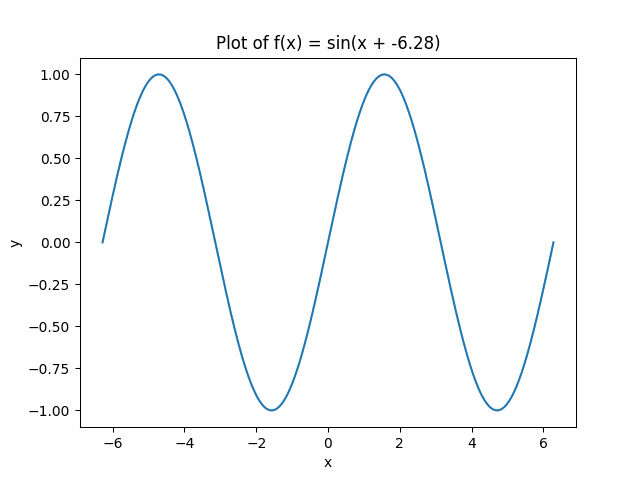

In [16]:
# load additional libraries
from matplotlib.animation import FuncAnimation, PillowWriter
import tempfile

# Initialize the plot
fig, ax = plt.subplots()
line, = ax.plot(x, f(x, 0))
ax.set_xlabel('x')
ax.set_ylabel('y')
title = ax.set_title('Plot of f(x) = sin(x + 0.00)')

# Function to update the plot
def update_plot(b):
    line.set_ydata(f(x, b))  # Update the y data of the plot
    title.set_text(f'Plot of f(x) = sin(x + {b:.2f})')  # Update the title
    return line, title

# Desired range and step size for the slider
min_b = -2 * np.pi
max_b = 2 * np.pi
step_size = 0.1

# Create FuncAnimation object
anim = FuncAnimation(
    fig, update_plot, frames=np.arange(min_b, max_b, step_size), interval=100, blit=True
)

# Function to display the animation
def display_animation(anim):
    with tempfile.NamedTemporaryFile(delete=False, suffix='.gif') as tmpfile:
        temp_path = tmpfile.name
    writer = PillowWriter(fps=10)
    anim.save(temp_path, writer=writer)
    
    return Image(filename=temp_path)

# Display the animation as a GIF
display(display_animation(anim))

plt.close(fig)